In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##### The records could not be decoded using UTF-8, UTF-16, or UTF-32 encoding schemes. They were successfully decoded using ISO-8859-16 (Latin-10), which is an extended version of Latin-1. ISO-8859-16 covers a set of characters used in European languages and other regions.


In [2]:
df = pd.read_csv('/Users/anilthapa/Downloads/judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-16')

In [3]:
df.shape

(9093, 3)

We see a whole lot of missing values in second columns. However, in our first column there is only one missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [5]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [6]:
df.columns =['tweet', 'device', 'emotion']

There is four category of emotions, of which the three is pretty straightforward. But there is also an extra category in there that does not reflect the emotion at all. Lets delve to find out what we can do with "I can't tell" category

In [7]:
df['emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

Given that our total record size is (9093, 3) the emotion with "I can't tell" category only occupies about 156 rows which is about 1.7 % of total record, which we can drop it.

In [8]:
pd.set_option('display.max_colwidth', None)

Just seeing our tweet with where there is "I can't tell the emotion" category>

In [9]:
df[df['emotion'] == "I can't tell"]

,tweet,device,emotion
90,Thanks to @mention for publishing the news of @mention new medical Apps at the #sxswi conf. blog {link} #sxsw #sxswh,NaN,I can't tell
102,ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow,NaN,I can't tell
237,"Just what America needs. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",NaN,I can't tell
341,The queue at the Apple Store in Austin is FOUR blocks long. Crazy stuff! #sxsw,NaN,I can't tell
368,Hope it's better than wave RT @mention Buzz is: Google's previewing a social networking platform at #SXSW: {link},NaN,I can't tell
...,...,...,...
9020,It's funny watching a room full of people hold their iPad in the air to take a photo. Like a room full of tablets staring you down. #SXSW,NaN,I can't tell
9032,"@mention yeah, we have @mention , Google has nothing on us :) #SXSW",NaN,I can't tell
9037,"@mention Yes, the Google presentation was not exactly what I was expecting. #sxsw",NaN,I can't tell
9058,&quot;Do you know what Apple is really good at? Making you feel bad about your Xmas present!&quot; - Seth Meyers on iPad2 #sxsw #doyoureallyneedthat?,NaN,I can't tell


Here we only include the records with just three emotion

In [10]:
df = df[df['emotion'] !="I can't tell"]

In [11]:
df['emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product'], dtype=object)

Taking only 'tweet' and 'emotion' column into consideration because, 'device' column contains a lot of null values (approximately 64 % null values of total records). And, our domain knowledge tells us that the device they tweet do not have significant impact on the sentiment of the tweet.

In [12]:
df = df[['tweet', 'emotion']]

Earlier, we found out that our 'tweet' column contain only one null values, let us see the record and drop it.

In [13]:
df[df.isnull().any(axis = 1)]

,tweet,emotion
6,NaN,No emotion toward brand or product


In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().any()

tweet      False
emotion    False
dtype: bool

### Train, Test Split

In [16]:
X, y = df['tweet'], df['emotion']

In [17]:
X.shape

(8936,)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
count_vectorizer = CountVectorizer()

In [20]:
X = count_vectorizer.fit_transform(X)

In [21]:
X

<8936x9692 sparse matrix of type '<class 'numpy.int64'>'
	with 145719 stored elements in Compressed Sparse Row format>

In [22]:
X = X.toarray()

In [23]:
X.shape

(8936, 9692)

In [1]:
#for i in count_vectorizer.get_feature_names_out():
#    print(i)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
encoder = LabelEncoder()

In [27]:
y = encoder.fit_transform(y.values.reshape(-1,1))

/Users/anilthapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
y.shape

(8936,)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Import and Train the Model
### 1. Gaussian NB

In [30]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

In [31]:
gaussian_NB = GaussianNB()

In [32]:
X_train.shape

(7148, 9692)

In [33]:
y_train.shape

(7148,)

In [34]:
gaussian_NB.fit(X_train, y_train)

GaussianNB()

In [35]:
y_predict_gn = gaussian_NB.predict(X_test)

### Metrics

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [37]:
accuracy = accuracy_score(y_test, y_predict_gn)
print('Accuracy Score: ', accuracy)

Accuracy Score:  0.4955257270693512


In [38]:
c_report = classification_report(y_test, y_predict_gn)
print('Classification report:', c_report)

Classification report:               precision    recall  f1-score   support

           0       0.16      0.36      0.22       126
           1       0.73      0.44      0.55      1094
           2       0.43      0.63      0.51       568

    accuracy                           0.50      1788
   macro avg       0.44      0.48      0.43      1788
weighted avg       0.59      0.50      0.51      1788



Confusion Matrix: [[ 45  39  42]
 [172 481 441]
 [ 70 138 360]]


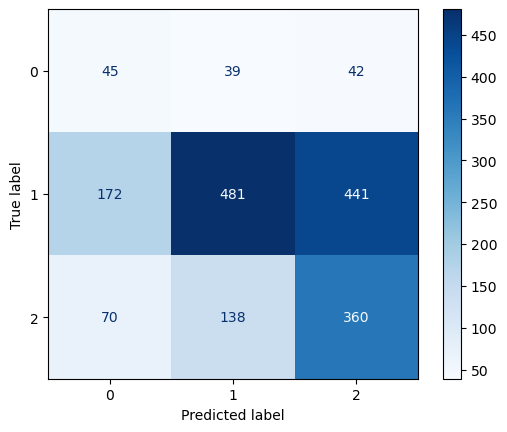

In [39]:
c_matrix_gn = confusion_matrix(y_test, y_predict_gn, labels=gaussian_NB.classes_)
print('Confusion Matrix:', c_matrix_gn)
plt = ConfusionMatrixDisplay(confusion_matrix=c_matrix_gn, display_labels=gaussian_NB.classes_)
plt.plot(cmap='Blues')

### Import and Train the Model
### 2. Multinomial NB

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
multinomial_NB = MultinomialNB()

In [42]:
multinomial_NB.fit(X_train, y_train)

MultinomialNB()

In [48]:
y_predict_mn = multinomial_NB.predict(X_test)

### Metrics

In [49]:
y_predict_mn.shape

(1788,)

In [50]:
y_test.shape

(1788,)

In [51]:
accuracy = accuracy_score(y_test, y_predict_mn)
print('Accuracy Score: ', accuracy)

Accuracy Score:  0.6482102908277405


In [52]:
c_report = classification_report(y_test, y_predict_mn)
print('Classification report:', c_report)

Classification report:               precision    recall  f1-score   support

           0       0.39      0.13      0.19       126
           1       0.74      0.74      0.74      1094
           2       0.51      0.58      0.54       568

    accuracy                           0.65      1788
   macro avg       0.55      0.48      0.49      1788
weighted avg       0.64      0.65      0.64      1788



Confusion Matrix: [[ 16  59  51]
 [ 18 813 263]
 [  7 231 330]]


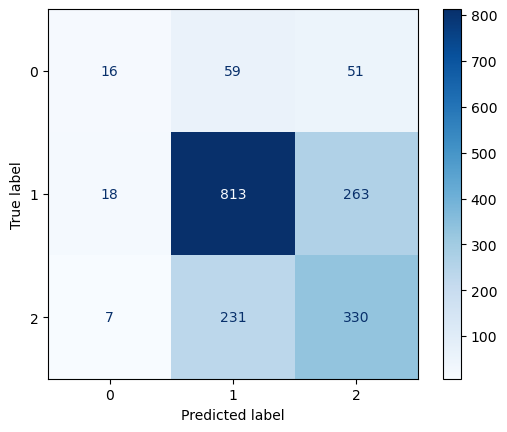

In [56]:
c_matrix_mn = confusion_matrix(y_test, y_predict_mn, labels=multinomial_NB.classes_)
print('Confusion Matrix:', c_matrix_mn)
plt = ConfusionMatrixDisplay(confusion_matrix=c_matrix_mn, display_labels=multinomial_NB.classes_)
plt.plot(cmap='Blues')